In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

import dataretrieval.nwis as nwis

#import os.path

13092747 (2013-2023) Non-ref

" " 

12413370 (2010-2021) ref, 2490, 28.2

" "

13266000 ref (2017-2018)

" "

 13311000 (2012-2023) Usgs:  646619.3

" "

12305000 (2012-2023)

" "

13340600


In [2]:
site  = "13211205"
# get basic info about the site
df3 = nwis.get_record(sites=site, service='site')

print(df3.columns)
dec_lat_va=df3['dec_lat_va'][0]
dec_long_va=df3['dec_long_va'][0]
station_nm=df3['station_nm'][0]
alt_va =df3['alt_va'][0] 
drain_area_va=df3['drain_area_va'][0] 

#print(station_nm)
print(df3[['alt_va', 'alt_meth_cd', 'alt_acy_va', 'drain_area_va', 'contrib_drain_area_va']])

Index(['agency_cd', 'site_no', 'station_nm', 'site_tp_cd', 'lat_va', 'long_va',
       'dec_lat_va', 'dec_long_va', 'coord_meth_cd', 'coord_acy_cd',
       'coord_datum_cd', 'dec_coord_datum_cd', 'district_cd', 'state_cd',
       'county_cd', 'country_cd', 'land_net_ds', 'map_nm', 'map_scale_fc',
       'alt_va', 'alt_meth_cd', 'alt_acy_va', 'alt_datum_cd', 'huc_cd',
       'basin_cd', 'topo_cd', 'instruments_cd', 'construction_dt',
       'inventory_dt', 'drain_area_va', 'contrib_drain_area_va', 'tz_cd',
       'local_time_fg', 'reliability_cd', 'gw_file_cd', 'nat_aqfr_cd',
       'aqfr_cd', 'aqfr_type_cd', 'well_depth_va', 'hole_depth_va',
       'depth_src_cd', 'project_no'],
      dtype='object')
   alt_va  alt_meth_cd  alt_acy_va  drain_area_va  contrib_drain_area_va
0     NaN          NaN         NaN           3363                   3363


In [3]:
path=  r"../data_prep/prism_df_summer_" +site +".csv"  # os.path.join( r"../data_prep/prism_df_summer_",  site ,".csv" )

data=pd.read_csv( path )  

#12413370,13190500,13018300, 13211205
#13266000,
#13296000 (Yankee Fork Salmon River NR Clayton ID),
#13311000, 13340600, 13092747, 12305000, 13342500, 13150430, 13016450, 13176400, 13310800, 13317660, 13192200, 12322000, 13139510,13341050

print(data)
print(data.columns)

     Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0           153  2016-06-01      0.00               8.9               18.3   
1           154  2016-06-02      0.00               9.7               21.4   
2           155  2016-06-03      0.00              13.9               21.7   
3           156  2016-06-04      0.00              13.5               22.0   
4           157  2016-06-05      0.00              13.4               23.7   
..          ...         ...       ...               ...                ...   
656        2639  2023-08-27      2.75              16.2               24.8   
657        2640  2023-08-28      0.00              15.9               24.4   
658        2641  2023-08-29      0.00              16.1               25.6   
659        2642  2023-08-30      0.00              12.7               23.0   
660        2643  2023-08-31      0.00               9.8               17.3   

     tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  vpdmax

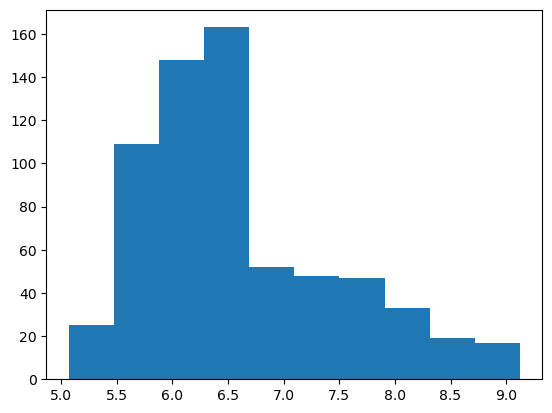

(array([491.,  58.,  46.,  15.,  21.,  11.,   2.,   2.,   3.,  12.]),
 array([ 159. , 1059.1, 1959.2, 2859.3, 3759.4, 4659.5, 5559.6, 6459.7,
        7359.8, 8259.9, 9160. ]),
 <BarContainer object of 10 artists>)

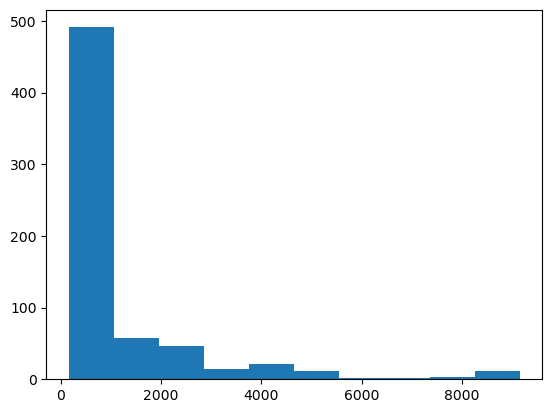

In [4]:
data['log_Q']=np.log(data['X_00060_00003'])
data
plt.hist(data['log_Q'])
plt.show()
plt.hist(data['X_00060_00003'])

Text(0, 0.5, 'Streamflow (cfs)')

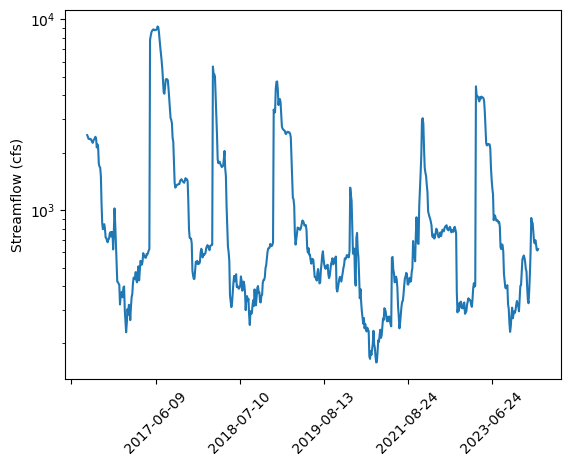

In [5]:
plt.plot(data['Date'] , data['X_00060_00003'] )
plt.yscale('log')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Streamflow (cfs)")

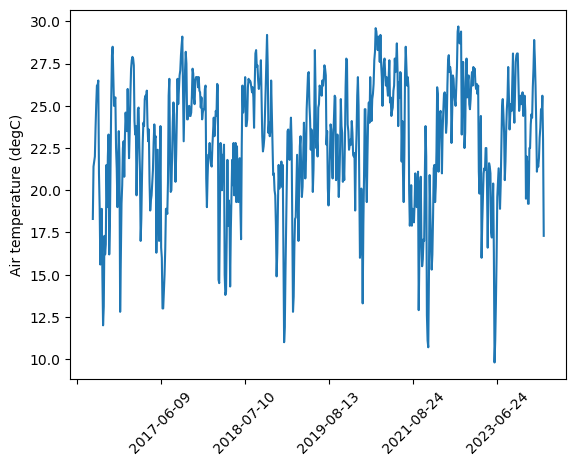

In [6]:
plt.plot(data['Date'] , data['tmean..degrees.C.'] )


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

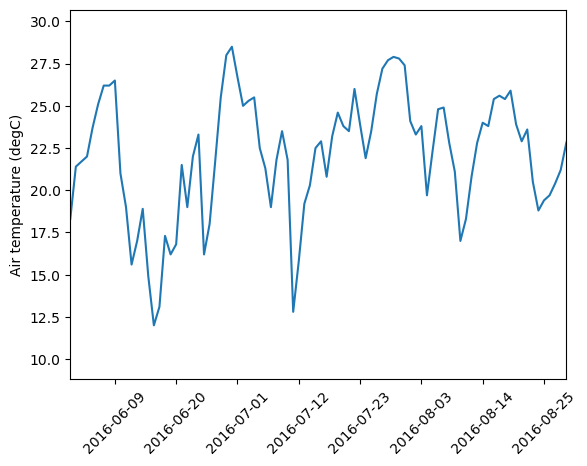

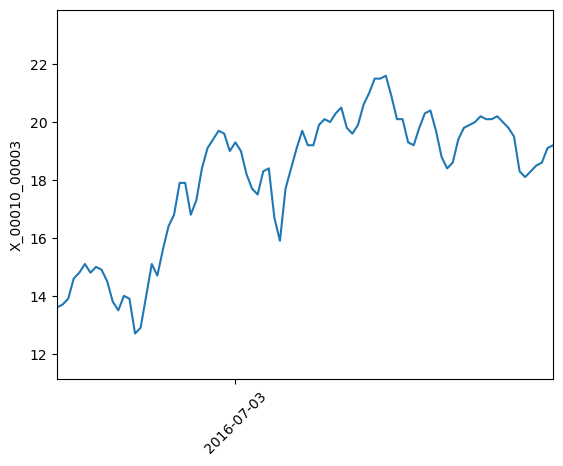

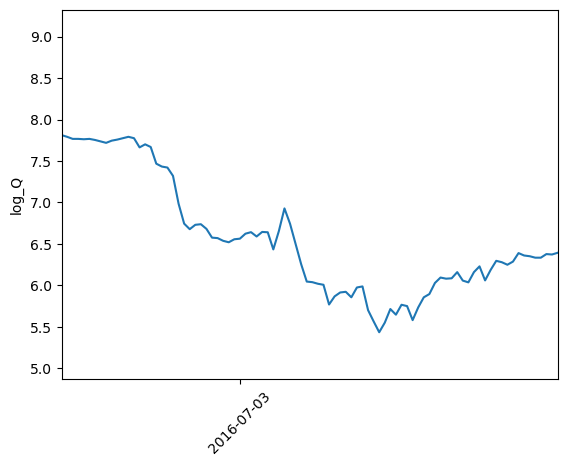

In [7]:
start=0
end=89

plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.xlim(  data['Date'][start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

plt.plot(data['Date'] , data['X_00010_00003'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('X_00010_00003')
plt.show()

plt.plot(data['Date'] , data['log_Q'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('log_Q')
plt.show()

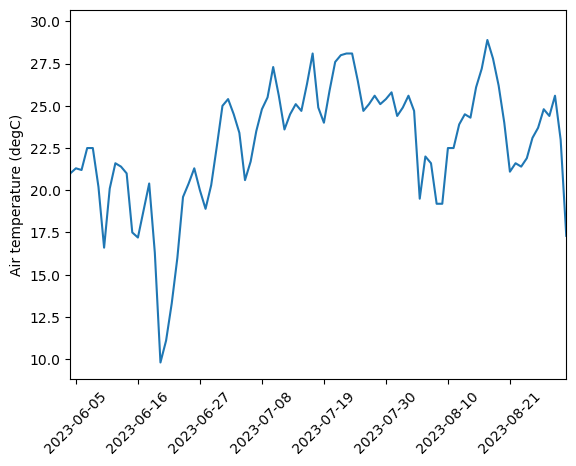

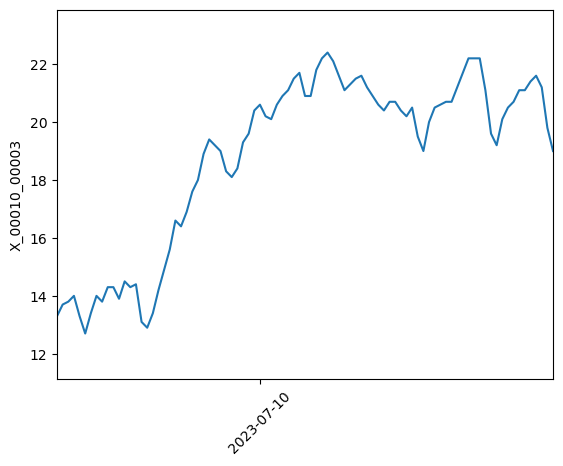

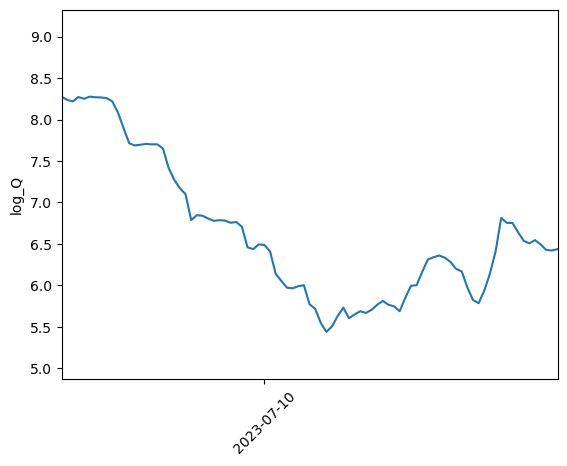

In [8]:
start=len(data)-89
end=len(data)-1

plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.xlim(  data['Date'][start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

plt.plot(data['Date'] , data['X_00010_00003'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('X_00010_00003')
plt.show()

plt.plot(data['Date'] , data['log_Q'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('log_Q')
plt.show()

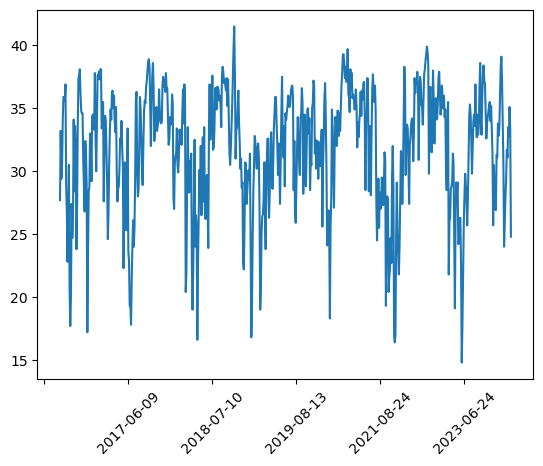

In [9]:
plt.plot(data['Date'] , data[ 'tmax..degrees.C.'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

Text(0, 0.5, 'Water temperature (degC)')

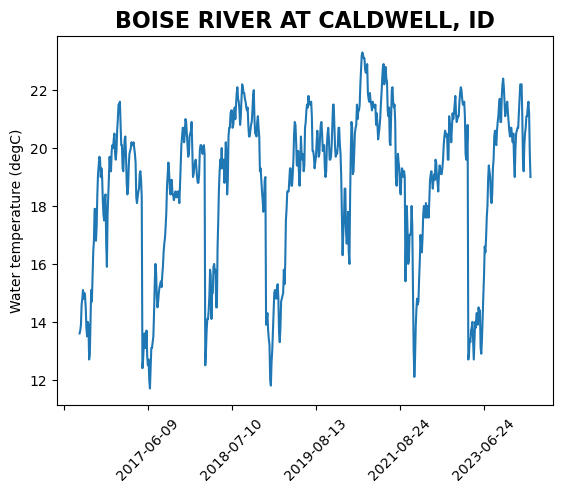

In [10]:
plt.plot(data['Date'] , data[ 'X_00010_00003'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.ylabel("Water temperature (degC)")

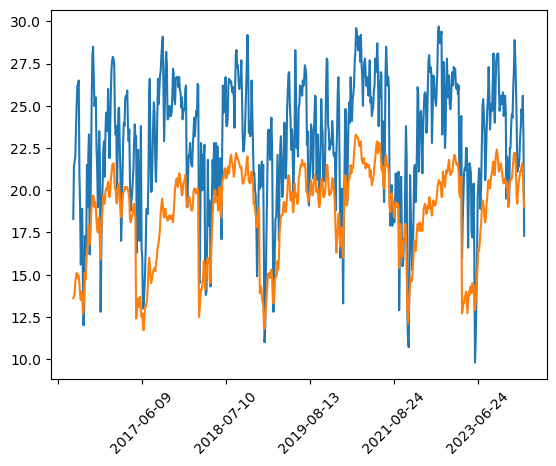

In [11]:
plt.plot(data['Date'] , data[ 'tmean..degrees.C.'] )
plt.plot(data['Date'] , data[ 'X_00010_00003'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

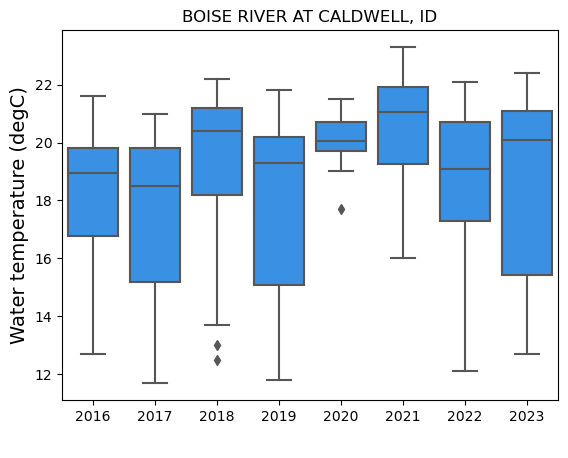

In [12]:
#data.boxplot(column=['X_00010_00003'], by='yr', title=station_nm)

#plt.ylabel("Water temperature (degC)")


import seaborn as sns



ax=sns.boxplot(x="yr", y="X_00010_00003", data=data , color="dodgerblue")
ax.set_ylabel( "Water temperature (degC)" , fontsize=14 #, color="red"
             )
ax.set_xlabel( " " , fontsize=14 #, color="red"
             )
ax.set_title( station_nm)
plt.show()

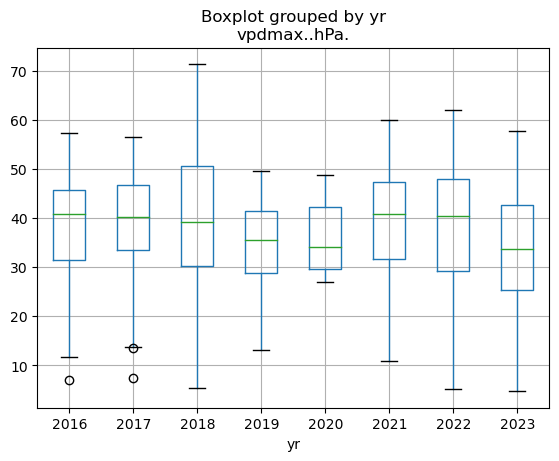

In [13]:
# 'vpdmax..hPa.'
data.boxplot(column=['vpdmax..hPa.'], by='yr')
plt.show()

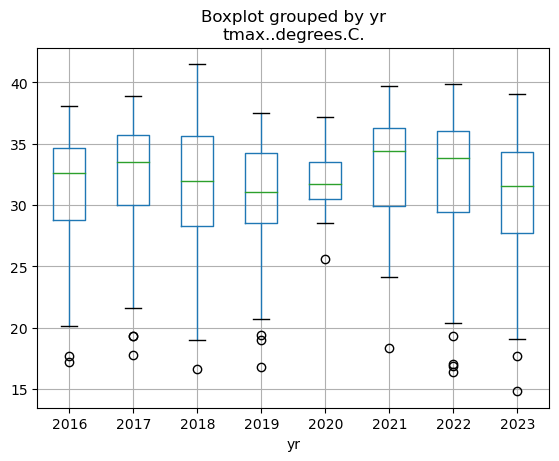

In [14]:
data.boxplot(column=['tmax..degrees.C.'], by='yr')
plt.show()

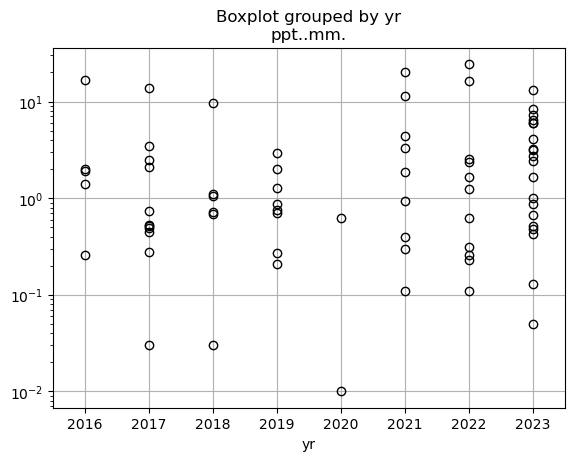

In [15]:
data.boxplot(column=['ppt..mm.'], by='yr')

plt.yscale('log')
plt.show()

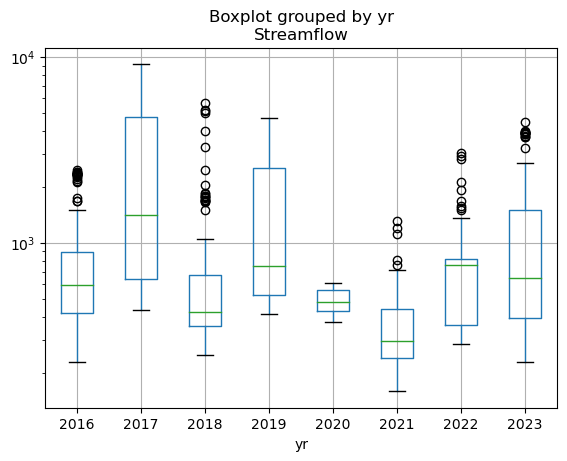

In [16]:
data.boxplot(column=['X_00060_00003'], by='yr')
plt.yscale('log')
plt.title("Streamflow")
plt.show()

In [17]:
#data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

                    ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
ppt..mm.            1.000000         -0.102416          -0.233495   
tmin..degrees.C.   -0.102416          1.000000           0.916839   
tmean..degrees.C.  -0.233495          0.916839           1.000000   
tmax..degrees.C.   -0.301400          0.774865           0.962732   
tdmean..degrees.C.  0.177229          0.649543           0.525392   
vpdmin..hPa.       -0.276372          0.646454           0.663094   
vpdmax..hPa.       -0.322288          0.662710           0.890587   
X_00010_00003      -0.154376          0.664643           0.727550   
X_00060_00003       0.112253         -0.370479          -0.424253   
doy                -0.089663          0.292182           0.360548   
log_Q               0.124934         -0.465245          -0.520673   

                    tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  \
ppt..mm.                   -0.301400            0.177229     -0.276372   
tmin..degrees.C.       

<Axes: >

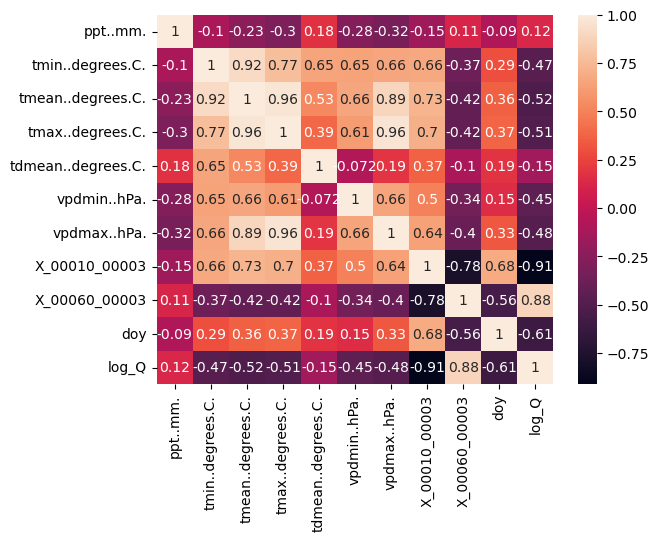

In [18]:
all_idv=[ 'ppt..mm.' 
     , 'tmin..degrees.C.'
     ,'tmean..degrees.C.'
     , 'tmax..degrees.C.', 'tdmean..degrees.C.',
      'vpdmin..hPa.', 
     'vpdmax..hPa.', 
   #     'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy','log_Q' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q
ppt..mm.           1.000000          -0.233495     -0.322288  0.124934
tmean..degrees.C. -0.233495           1.000000      0.890587 -0.520673
vpdmax..hPa.      -0.322288           0.890587      1.000000 -0.484240
log_Q              0.124934          -0.520673     -0.484240  1.000000


<Axes: >

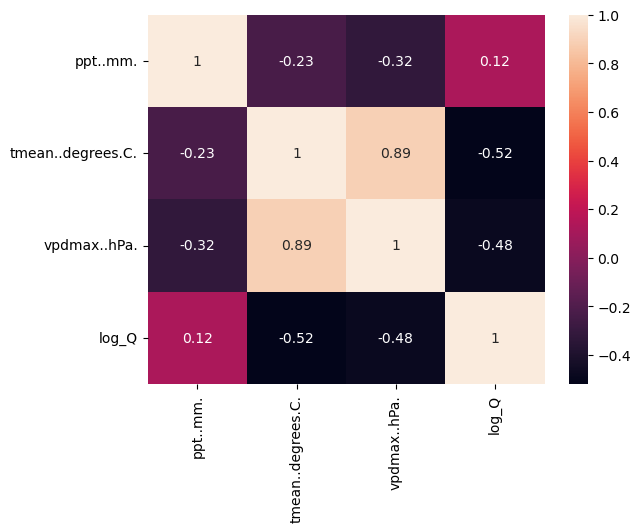

In [19]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.' #, 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
     #  'X_00060_00003' #,   'yr', 'mo',
    # ,'doy'
     ,'log_Q'
    ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

In [20]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_train.columns)

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q
533      0.00               27.3         52.97  6.638568
552      0.00               24.8         43.35  5.793014
613      0.00               24.7         41.20  5.963579
61       0.00               24.1         45.69  5.765191
430      0.00               26.7         46.74  5.365976
..        ...                ...           ...       ...
71       0.00               18.3         27.15  6.159095
106      0.00               16.5         22.81  8.955448
270      0.00               16.3         23.01  6.472346
435      0.00               25.2         29.81  5.723585
102      2.49               13.0         15.08  9.091557

[528 rows x 4 columns]
533    20.1
552    20.9
613    21.1
61     20.1
430    21.5
       ... 
71     18.6
106    13.1
270    18.2
435    21.2
102    12.0
Name: X_00010_00003, Length: 528, dtype: float64
Index(['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q'], dtype='object')


In [21]:
print(idv)
idv2=idv +  ['yr' ]
print(idv2)
idv3=idv2 +  [  'X_00010_00003']
input=  data[  idv2]
#input
X=input[idv2]




X_train=X[X['yr']<2021]
#print(X_train)
X_test=X[X['yr']>=2021]

input2=  data[  idv3]
Y=input2[idv3]
y_train=Y[Y['yr']<2021][  'X_00010_00003']
print(y_train)

y_test=Y[Y['yr']>=2021][  'X_00010_00003']


['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q', 'yr']
0      13.6
1      13.7
2      13.9
3      14.6
4      14.8
       ... 
380    20.7
381    20.1
382    19.8
383    19.0
384    17.7
Name: X_00010_00003, Length: 385, dtype: float64


In [22]:
print(X_train)

X_train=X_train[[ 'ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']]
X_test= X_test[[ 'ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']]

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q    yr
0        0.00               18.3         30.80  7.811973  2016
1        0.00               21.4         42.23  7.791523  2016
2        0.00               21.7         34.05  7.766417  2016
3        0.00               22.0         31.89  7.766417  2016
4        0.00               23.7         42.71  7.762171  2016
..        ...                ...           ...       ...   ...
380      0.01               23.4         29.61  6.364751  2020
381      0.00               22.1         31.21  6.361302  2020
382      0.00               22.0         35.79  6.343880  2020
383      0.00               22.2         42.10  6.336826  2020
384      0.00               18.8         26.88  6.416732  2020

[385 rows x 5 columns]


0.9649902127174019


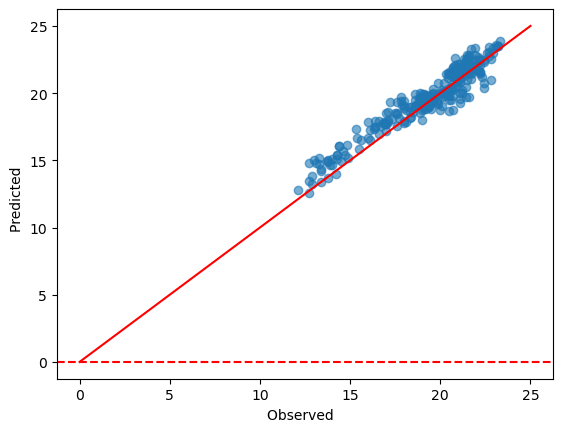

test: 0.9563043386364642
0.6863464323776091


In [23]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed  ")
plt.ylabel("Predicted  ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [24]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.8953352099662129
test correlation_coefficient: 0.7632212754109692
MSE: 1.4479296066252583
RMS: 1.7354577765458081
max depth: 2
test correlation_coefficient: 0.9360169632051024
test correlation_coefficient: 0.8649739040922112
MSE: 1.160534743186915
RMS: 1.4203101415894384
max depth: 3
test correlation_coefficient: 0.9595369335559762
test correlation_coefficient: 0.9108983262485435
MSE: 0.9196766990314742
RMS: 1.151012530103421
max depth: 4
test correlation_coefficient: 0.9719002439796798
test correlation_coefficient: 0.9260332960485238
MSE: 0.8218547508158598
RMS: 1.0511276538000272
max depth: 5
test correlation_coefficient: 0.9832501311972353
test correlation_coefficient: 0.9251044383485386
MSE: 0.8106777262782145
RMS: 1.0342266804932894
max depth: 6
test correlation_coefficient: 0.9872325051492465
test correlation_coefficient: 0.9294714742229555
MSE: 0.8030383408277851
RMS: 1.0128713832499538
max depth: 7
test correlation_coefficient: 0.991

max depth: 5
correlation_coefficient: 0.9251044383485386
MSE: 0.8106777262782145
RMS: 1.0342266804932894


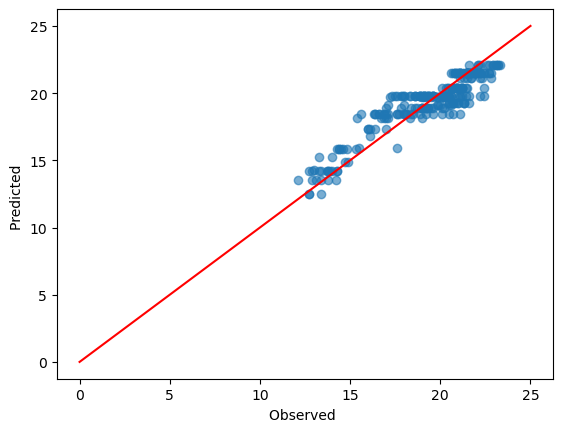

In [25]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [26]:
print(regr.feature_importances_)
print(idv)

[1.37562463e-03 6.42631459e-02 6.62183577e-04 9.33699046e-01]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']


In [27]:
params = {
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [28]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.9679


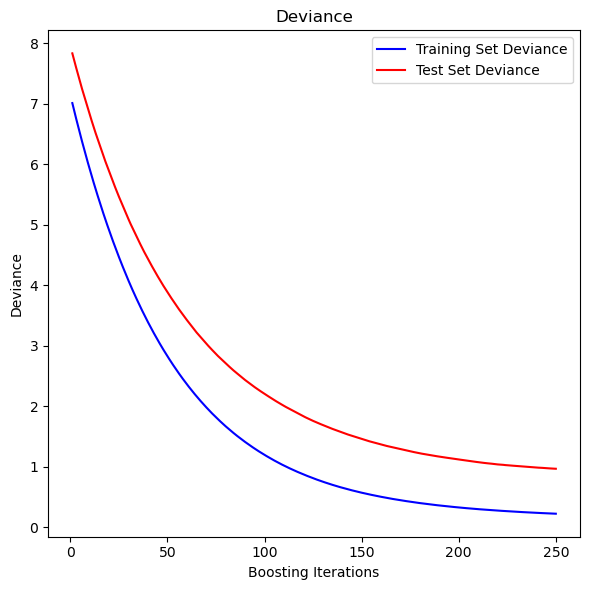

In [29]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

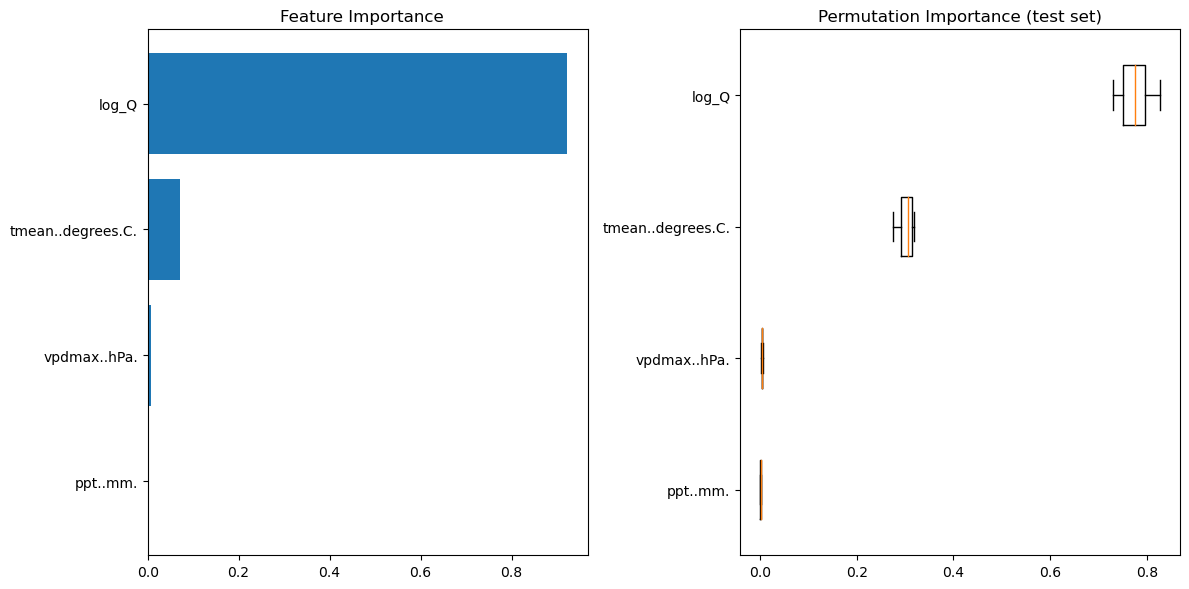

In [30]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [31]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [32]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    
    
    perm_sorted_idx = result.importances_mean.argsort()
    print(perm_sorted_idx)
    print(X.columns[perm_sorted_idx][3])

    
    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax


The plot on the left shows the Gini importance of the model. 

permuting a feature

[0 2 1 3]
log_Q


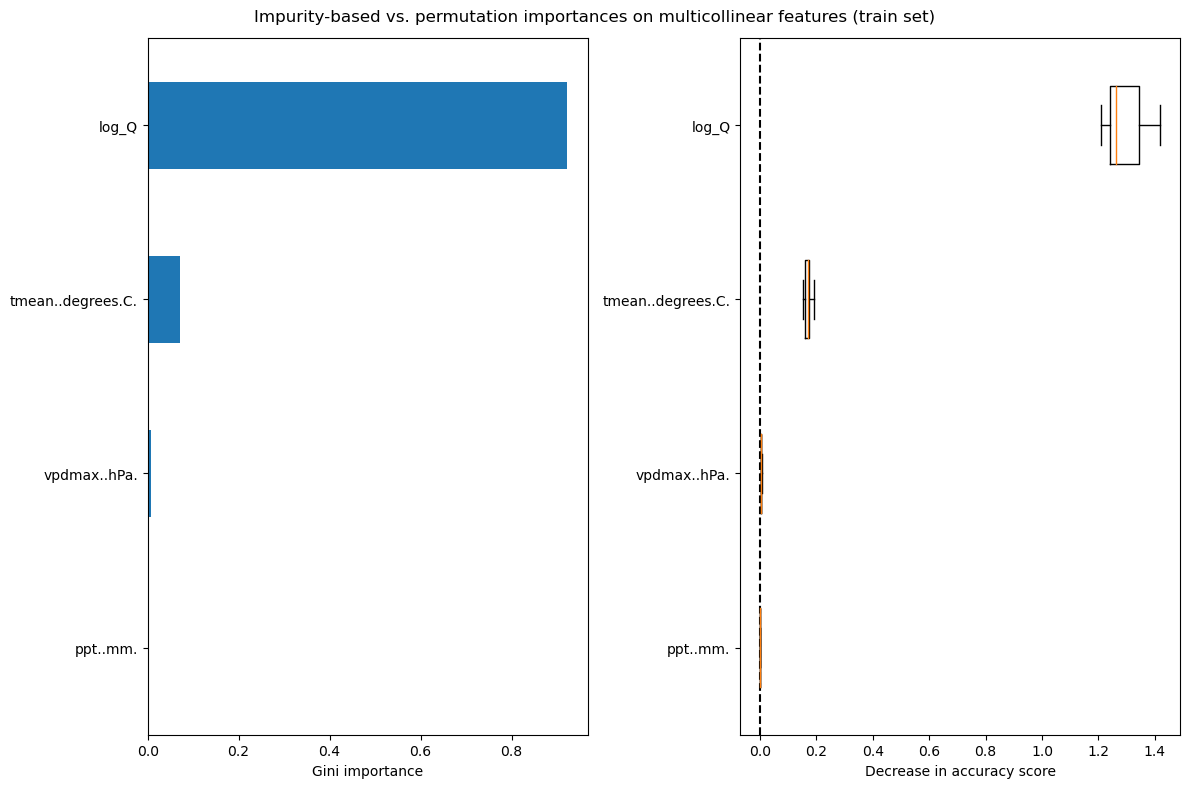

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(reg, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

correlation_coefficient: 0.9456336858645719
MSE: 0.7959388277563745
RMS: 0.9839640784504349


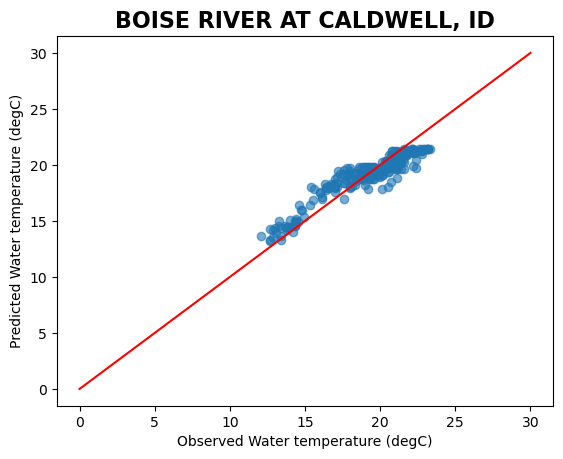

In [34]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed Water temperature (degC)")
plt.ylabel("Predicted Water temperature (degC)")

x = np.linspace(0, 30, 30)
y = x
plt.plot(x, y, color='red')

plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.show()

385    16.3
386    17.1
387    17.5
388    18.6
389    18.6
       ... 
656    21.4
657    21.6
658    21.2
659    19.8
660    19.0
Name: X_00010_00003, Length: 276, dtype: float64
[18.26253389 18.36236935 19.21955525 19.77582419 19.67407973 18.8922405
 18.28922402 18.74505126 19.09857977 17.78964835 17.54152267 18.22141078
 19.05209331 20.39458055 20.39458055 19.43357838 19.09857977 19.76959937
 20.28072666 20.2930015  20.08805664 21.20637328 20.27322522 20.14104733
 20.30050295 20.85443026 21.20312463 21.2113006  21.45360974 21.43726311
 21.43726311 21.43726311 21.45360974 21.45360974 21.45360974 21.2113006
 21.43726311 21.20050316 21.19740154 20.26836945 21.1810549  21.2113006
 21.19495396 21.19740154 21.01764332 21.19740154 21.02331278 20.85437663
 21.19740154 21.21702369 20.41435683 20.41435683 20.39458055 20.26836945
 20.26836945 20.84870716 21.02336642 21.19684239 21.203071   21.2113006
 21.43915154 19.90746827 19.74437011 20.93684161 20.41435683 21.09306018
 21.11653685 19.6525

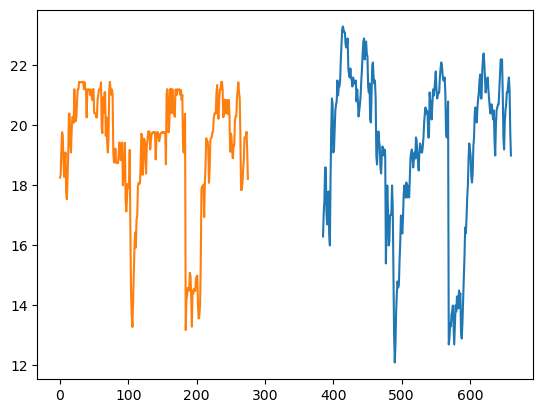

385    2021-06-01
386    2021-06-02
387    2021-06-03
388    2021-06-04
389    2021-06-05
          ...    
656    2023-08-27
657    2023-08-28
658    2023-08-29
659    2023-08-30
660    2023-08-31
Name: Date, Length: 276, dtype: object


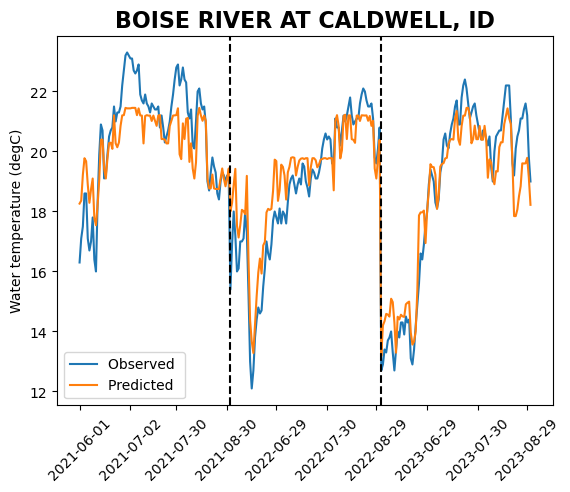

In [35]:



print(y_test)
print(yfit)
print(Y)
plt.plot(y_test)
plt.plot(yfit)
plt.show()

date=data[data['yr']>=2021][  'Date']
print(date)
plt.plot(date,y_test , label='Observed ')

#plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter())  # Formats labels concisely

plt.plot(date,yfit , label='Predicted ')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Display every 10th label
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts for missing dates
plt.axvline(x= "2022-06-01", color='black', linestyle='--')
plt.axvline(x= "2023-06-01", color='black', linestyle='--')
plt.gca().xaxis.set_tick_params(rotation=45 )  # Rotate labels for readability
plt.ylabel("Water temperature (degC)")
#pd.dataframe("date"= ,"y_test"= ,"yfit"=yfit)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.legend()

In [36]:
max_bias=max(yfit-y_test)
max_bias

2.6056812728524843

In [37]:
#plt.hist(y_test , alpha=0.5)
#plt.show()

#plt.hist(yfit , alpha=0.5)
#plt.show()

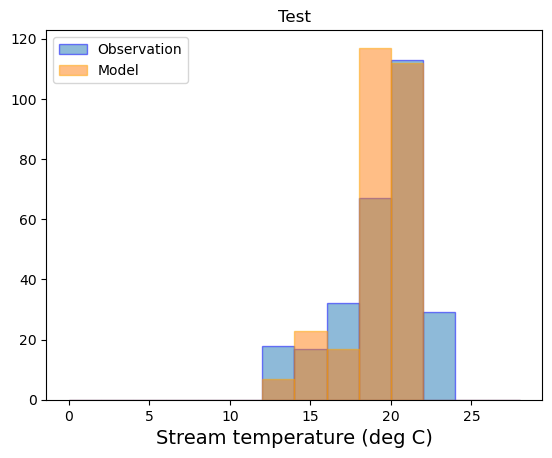

In [38]:
bins = np.arange(10, 25, 2)
bins = np.arange(0, 30, 2)
bars1, _, _ = plt.hist(y_test , alpha=0.5 , label="Observation",bins=bins , edgecolor='blue')
bars2, _, _ = plt.hist(yfit , alpha=0.5, label="Model",bins=bins , edgecolor='orange')
plt.legend(   )
plt.xlabel("Stream temperature (deg C)", fontsize=14 )
plt.title("Test")
plt.show()

In [39]:
#plt.hist(y_test , alpha=0.5)
#plt.hist(yfit , alpha=0.5)

#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["y_test","yfit"])
#plt.legend()

In [40]:
#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["observation","model"])
#plt.legend()
#plt.xlabel("Stream temperature (deg C)", fontsize=14 )
#plt.title("Test")

upper alpha=0.95

correlation_coefficient: 0.9412966617181736
MSE: 0.9846312965346605
RMS: 1.2445544387040222


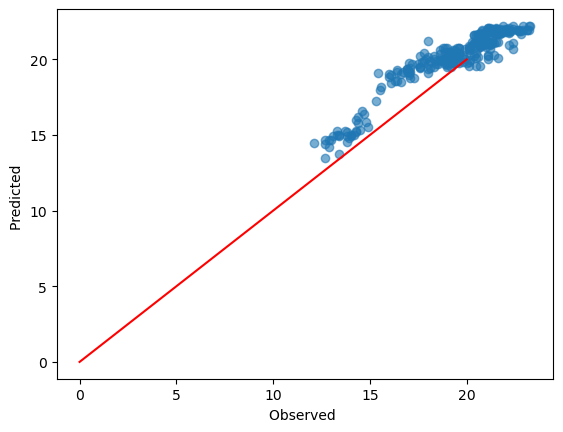

In [41]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

lower upper alpha=0.05

correlation_coefficient: 0.9110281688411455
MSE: 1.162118735630203
RMS: 1.4881742419337796


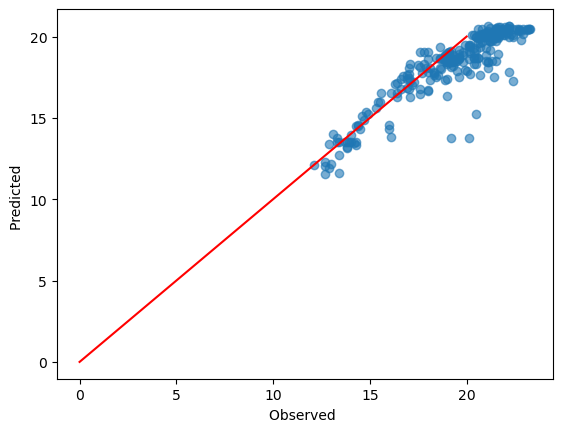

In [42]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.05,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [43]:
params = {"loss": "lad" , #,"huber",
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

correlation_coefficient: 0.9456380443956756
MSE: 0.7959142259065423
RMS: 0.9839139273210175


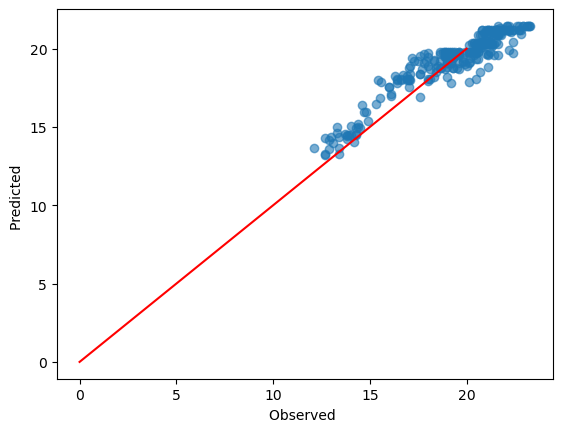

In [44]:
regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [47]:
data = {
    
    "site"  : [ site],
'alt_va': [ alt_va],
    'drain_area_va': [ drain_area_va],
    
"station_nm" :[df3['station_nm'][0]],
    "dec_lat_va":[df3['dec_lat_va'][0]],
    "dec_long_va": [df3['dec_long_va'][0]],
    'max_bias': [max_bias],
        "RMS": [rms],
        "correlation_coefficient": [correlation_coefficient],
    "perm":[perm]
       }
result = pd.DataFrame(data)
print(result)

       site  alt_va  drain_area_va                   station_nm  dec_lat_va  \
0  13211205     NaN           3363  BOISE RIVER AT CALDWELL, ID   43.677353   

   dec_long_va  max_bias       RMS  correlation_coefficient   perm  
0  -116.701131  2.605681  0.983914                 0.945638  log_Q  


In [48]:
file= "result"+site+".csv"
file
result.to_csv(file)

In [46]:
#perm="tmean..degrees.C."
perm="log_Q"
#perm="tmean..degrees.C."
#perm="tmean..degrees.C. & log_Q"